In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math

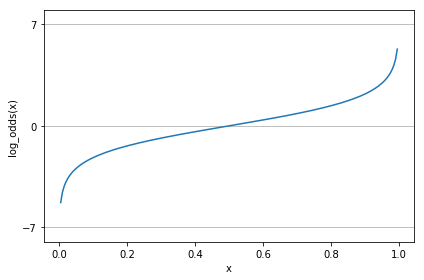

In [5]:
def log_odds(p):
    return np.log(p/(1 - p))

x = np.arange(0.005, 1, 0.005)
log_odds_x = log_odds(x)
plt.plot(x, log_odds_x)
plt.ylim(-8, 8)
plt.xlabel('x')
plt.ylabel('log_odds(x)')

# y axis ticks and gridline
plt.yticks([-7, 0, 7])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

### Q1. 위의 그래프를 어떻게 해석하면 좋을까?
- P값이 1에 가까워 질수록 로그 오즈가 무한대에 가까워진다
- P값이 0에 가까워 질수록 로그 오즈가 음의 무한대에 가까워 진다
- 따라서 계산식에서의 좌변 우변의 범위가 같아진다

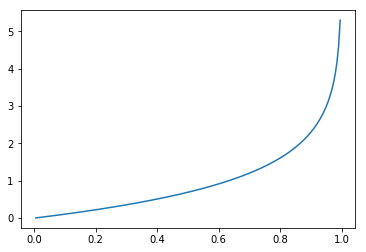

In [7]:
x = np.arange(0.005, 1, 0.005)
y = -np.log(1-x)
plt.plot(x,y)
plt.show()

### Q2. Logit 값에 역산을 취해주면 어떻게 될까?

로지스틱(시그모이드) 함수가 생성된다. 이를통해 오즈비를 계산할 수 있다
즉 B값에 exp를 취해 오즈비를 구하고 이를 바탕으로 Case별 p를 도출해 Cut-off와 비교하여 분류한다.
 

# Money Ball - Basic EDA & Modeling(Logistic)

### 2주차 과제는 Money Ball Data Analysis입니다. 
### 우리가 Binary Classification하고자 하는 변수는 play-off입니다.
### Money Ball Data Set을 분석하고 어느 팀이 play-off에 진출하는지 
### Logistic Regression방법을 통해 분석합니다.
_How does a team make the playoffs?_

_How does a team win more games?_

_How does a team score more runs?_

- 머니볼과 빅데이터
- http://writting.co.kr/2015/04/%EB%A8%B8%EB%8B%88%EB%B3%BC-%EA%B7%B8%EB%A6%AC%EA%B3%A0-%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0/

- _이번 과제를 통해 우리는 어떤 팀이  play-off(가을야구)에 진출하는지 로지스틱 모델을 통해 분석합니다._
+ _Ipython 파일의 빈 부분을 채워주세요._
+ _하나하나 천천히 따라와 주세요._ 

+ _W(Wins) Feature를 제외한 Feature들 중에서 가을야구 진출에 가장 영향을 많이 주는 Feature는 무엇일까요?_
+ _통념이 만연하던 야구의 편견을 깬 Money Ball은 과연 무엇일까요?_

### What is Money Ball?
- Billy Bean & DePodesta's Story.

In the early 2000s, Billy Beane and Paul DePodesta worked for the Oakland Athletics. While there, they literally changed the game of baseball. They didn't do it using a bat or glove, and they certainly didn't do it by throwing money at the issue; in fact, money was the issue. They didn't have enough of it, but they were still expected to keep up with teams that had much deeper pockets. This is where Statistics came riding down the hillside on a white horse to save the day. This data set contains some of the information that was available to Beane and DePodesta in the early 2000s, and it can be used to better understand their methods.

# 1. Import Library

- 앞으로 데이터 분석 및 모델링을 함에 있어서 첫 스텝은 필요한 Library를 불러오는 것입니다.

In [12]:
# python library import

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [13]:
from sklearn.linear_model import LogisticRegression # sklearn을 사용하여 Logistic 회귀분석을 할 경우 필요
import matplotlib.pyplot as plt # 시각화를 위한 library
import warnings
warnings.filterwarnings('ignore')

## Jupyter Notebook 이나 ipython 을 사용하다보면 향후 버전이 올라갈 때 변경될 사항 등을 알려주는 경고 메시지(warning message)가 거슬릴 때가 있습니다.
## 출처: https://rfriend.tistory.com/346 [R, Python 분석과 프로그래밍 (by R Friend)]

# 2. Load Data & Data Exploration 

* dataset 불러오기 
* pandas를 이용해서 CSV파일을 불러오세요
* 불러온 데이터를 파악해봅니다

In [14]:
data = pd.read_csv("./baseball.csv")
data.head() # pandas로 data를 불러오면 습관적으로 head()를 찍어봅니다!

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [15]:
# 주어진 데이터 셋이 어떤 데이터인지 한번 쭉 살펴봅니다.

* Tip. 우리가 일반적으로 알고 있는 데이터 셋이 아닐 경우 각각의 Feature(Column, Attribute)가 무엇을 의미하는지 이해할 필요가 있습니다.
**우리는 앞으로 Feature로 통일하겠습니다**
- Data Set에 대한 설명을 참조합니다.
- https://www.kaggle.com/wduckett/moneyball-mlb-stats-19622012

## 2-1. 각각의 데이터가 무엇을 의미하는지 파악하기
    - 이미 알고 있는 내용이라면 건너 뛰셔도 됩니다.
    e.g) Team: Major League Team 이름이구나.
         League: 소속 League를 말하는구나.
         Year: 데이터가 기록된 년도를 의미하는구나.
         Rs: (Runs Scored) 득점 스코어를 의미하는구나
         RA: (Runs Allowed) 실점스코어를 의미하는구나
         .
         .
         .

In [16]:
# 어떤 Feature가 있을까?
data.columns

Index(['Team', 'League', 'Year', 'RS', 'RA', 'W', 'OBP', 'SLG', 'BA',
       'Playoffs', 'RankSeason', 'RankPlayoffs', 'G', 'OOBP', 'OSLG'],
      dtype='object')

In [17]:
# Feature는 몇 개일까?
len(data.columns)

15

* 특정 feature는 종속 변수에 아무런 영향을 주지 않을 수 있습니다. 
* 그런 feature들을 파악하고 제거한다면 우리의 모델은 더욱 정확해 집니다.
* 하지만 마냥 변수를 제거할 수도 없는 노릇입니다. 
* 지난 1주차에 배웠던 EDA와 Preprocessing을 참고하여 데이터를 분석해봅시다.

## Data Exploration

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 각종 시각화 패키지 불러오기

In [19]:
# for using Korean font
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

In [20]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
Team            1232 non-null object
League          1232 non-null object
Year            1232 non-null int64
RS              1232 non-null int64
RA              1232 non-null int64
W               1232 non-null int64
OBP             1232 non-null float64
SLG             1232 non-null float64
BA              1232 non-null float64
Playoffs        1232 non-null int64
RankSeason      244 non-null float64
RankPlayoffs    244 non-null float64
G               1232 non-null int64
OOBP            420 non-null float64
OSLG            420 non-null float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


None

In [21]:
# 1232개의 entries, 15개의 column
# null 값이 있는지 isnull.sum()으로 확인을 해보자.

In [22]:
data.isnull().sum()

Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      988
RankPlayoffs    988
G                 0
OOBP            812
OSLG            812
dtype: int64

In [439]:
# 어떻게 처리할지 생각해보자

# Q. Null 값을 어떻게 전처리 할 것인가?
- 데이터를 본격적으로 분석 하기 전에 한번 생각해보도록 합니다.

In [23]:
display(data.describe())

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,244.000000,244.000000,1232.000000,420.000000,420.000000
mean,1988.957792,715.081981,715.081981,80.904221,0.326331,0.397342,0.259273,0.198052,3.122951,2.717213,161.918831,0.332264,0.419743
std,14.819625,91.534294,93.079933,11.458139,0.015013,0.033267,0.012907,0.398693,1.738349,1.095234,0.624365,0.015295,0.026510
min,1962.000000,463.000000,472.000000,40.000000,0.277000,0.301000,0.214000,0.000000,1.000000,1.000000,158.000000,0.294000,0.346000
25%,1976.750000,652.000000,649.750000,73.000000,0.317000,0.375000,0.251000,0.000000,2.000000,2.000000,162.000000,0.321000,0.401000
50%,1989.000000,711.000000,709.000000,81.000000,0.326000,0.396000,0.260000,0.000000,3.000000,3.000000,162.000000,0.331000,0.419000
75%,2002.000000,775.000000,774.250000,89.000000,0.337000,0.421000,0.268000,0.000000,4.000000,4.000000,162.000000,0.343000,0.438000
max,2012.000000,1009.000000,1103.000000,116.000000,0.373000,0.491000,0.294000,1.000000,8.000000,5.000000,165.000000,0.384000,0.499000


In [441]:
# 이산변수 W

## 2-2.  변수 종류 확인하기

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
Team            1232 non-null object
League          1232 non-null object
Year            1232 non-null int64
RS              1232 non-null int64
RA              1232 non-null int64
W               1232 non-null int64
OBP             1232 non-null float64
SLG             1232 non-null float64
BA              1232 non-null float64
Playoffs        1232 non-null int64
RankSeason      244 non-null float64
RankPlayoffs    244 non-null float64
G               1232 non-null int64
OOBP            420 non-null float64
OSLG            420 non-null float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


###  1) 범주형 변수 확인하기

In [25]:
# categorical variable
categorical_col = list(data.select_dtypes(include='object').columns)
categorical_col

['Team', 'League']

In [444]:
# play-off Feature의 경우 0과 1로 범주형이지만 데이터에는 int type로 저장되어있다.

###  2) 연속형 변수 확인하기

In [26]:
# numerical variable
numerical_col =  list(data.select_dtypes(include=('int64', 'float64')).columns)
numerical_col

['Year',
 'RS',
 'RA',
 'W',
 'OBP',
 'SLG',
 'BA',
 'Playoffs',
 'RankSeason',
 'RankPlayoffs',
 'G',
 'OOBP',
 'OSLG']

In [446]:
len(numerical_col)

13

### 3) 변수 종류 확인
- 2개의 categorical variable(Team, League)와 13개의 numerical variable

###  4) 각각의 변수에 어떤 값이 들어있을까?
- 각 변수별 unique값을 찍어본다.

In [27]:
# for categorical_col

for col in categorical_col:
    print(col + ': ', len(set(data[str(col)])))

Team:  39
League:  2


In [448]:
# 39개의 팀과 2개의 리그
# 리그는 지난 수십년간 2개였다.

In [28]:
# for numerical_col

for col in numerical_col:
    print(col + ': ', len(set(data[str(col)])))

Year:  47
RS:  374
RA:  381
W:  63
OBP:  87
SLG:  162
BA:  75
Playoffs:  2
RankSeason:  996
RankPlayoffs:  993
G:  8
OOBP:  884
OSLG:  924


In [450]:
# 지난 수십년은 46년이었다.
# Playoffs가 2인 것으로 보아 categorical 변수로 바꿔줘도 무관할 것 같다.
# Q. G(Games Played)는 어떤 값을 가지고 있을까?

In [29]:
data.G.head()

0    162
1    162
2    162
3    162
4    162
Name: G, dtype: int64

In [452]:
# Game 수이다. 한 시즌에 치뤄진 경기수를 나타낸다.

In [30]:
data.G.mean()

161.91883116883116

In [454]:
# 47년간 평균 161.918경기가 치뤄졌다. 

# 2. Data Preprocessing 

### T1. Column 삭제하기
- W(Wins), 승리 외에 팀의 가을야구 진출에 영향을 많이 미치는 Feature가 알고 싶습니다.
- del or drop을 사용하여 W column을 삭제해주세요

In [31]:
data.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [32]:
del data['W']
data.head()

,Team,League,Year,RS,RA,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [33]:
# W Column을 지워줬다.

### Task2. 인코딩: League
- League Feature는 AL과 NL로 이루어져 있습니다.
- 지난 시간에 배웠던 인코딩 방법을 적용해서 모델이 학습 할 수 있도록 처리해주세요.
- replace()함수를 사용합니다.

In [34]:
set(data.League)

{'AL', 'NL'}

In [35]:
data.League.replace({'AL':0, 'NL':1}, inplace=True)

In [36]:
data.League.head()

0    1
1    1
2    0
3    0
4    1
Name: League, dtype: int64

### Task3. column 삭제하기
- Team column을 삭제해주세요.
- Team column이 없어도 모델에는 큰 영향이 없을 것 같습니다.

In [37]:
data.head()

,Team,League,Year,RS,RA,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,1,2012,734,688,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,1,2012,700,600,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,0,2012,712,705,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,0,2012,734,806,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,1,2012,613,759,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [38]:
del data['Team']
data.head()

,League,Year,RS,RA,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,2012,734,688,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,1,2012,700,600,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,0,2012,712,705,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,0,2012,734,806,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,1,2012,613,759,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


### Task4. NaN값 처리하기
- head를 찍어보니 NaN값이 보입니다. 
- NaN값을 처리해 줍니다.

In [39]:
data.isnull().sum()

League            0
Year              0
RS                0
RA                0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      988
RankPlayoffs    988
G                 0
OOBP            812
OSLG            812
dtype: int64

In [40]:
# RankSeason, RankPlayoffs, OOBP, OSLG 변수에 Null 값이 있습니다.
# 우리는 위의 변수들에 NaN값을 처리해줄 것입니다.

data.RankSeason.head()

In [41]:
data.RankSeason.head()

0    NaN
1    4.0
2    5.0
3    NaN
4    NaN
Name: RankSeason, dtype: float64

In [42]:
data.RankPlayoffs.head()

0    NaN
1    5.0
2    4.0
3    NaN
4    NaN
Name: RankPlayoffs, dtype: float64

In [43]:
# OOBP는 Opponent On-Base Percentage. 
# OSLG는 Opponent Slugging Percentage.

data.describe()

,League,Year,RS,RA,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,244.000000,244.000000,1232.000000,420.000000,420.000000
mean,0.500000,1988.957792,715.081981,715.081981,0.326331,0.397342,0.259273,0.198052,3.122951,2.717213,161.918831,0.332264,0.419743
std,0.500203,14.819625,91.534294,93.079933,0.015013,0.033267,0.012907,0.398693,1.738349,1.095234,0.624365,0.015295,0.026510
min,0.000000,1962.000000,463.000000,472.000000,0.277000,0.301000,0.214000,0.000000,1.000000,1.000000,158.000000,0.294000,0.346000
25%,0.000000,1976.750000,652.000000,649.750000,0.317000,0.375000,0.251000,0.000000,2.000000,2.000000,162.000000,0.321000,0.401000
50%,0.500000,1989.000000,711.000000,709.000000,0.326000,0.396000,0.260000,0.000000,3.000000,3.000000,162.000000,0.331000,0.419000
75%,1.000000,2002.000000,775.000000,774.250000,0.337000,0.421000,0.268000,0.000000,4.000000,4.000000,162.000000,0.343000,0.438000
max,1.000000,2012.000000,1009.000000,1103.000000,0.373000,0.491000,0.294000,1.000000,8.000000,5.000000,165.000000,0.384000,0.499000


* OOBP와 OSLG값에 평균 값을 넣어주도록 합니다.
* sklearndml SimpleImputer를 사용합니다.
* 자세한 내용은 https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [44]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=0)
imputer = imputer.fit(data[['OOBP', 'OSLG']])

data[['OOBP', 'OSLG']] = imputer.transform(data[['OOBP', 'OSLG']])

In [45]:
data.OOBP.isnull().sum()

0

In [46]:
data.OSLG.isnull().sum()

0

In [47]:
data.RankPlayoffs.isnull().sum()

988

In [48]:
data.RankSeason.isnull().sum()

988

In [49]:
del data['RankPlayoffs']
del data['RankSeason']

In [50]:
data.head()

,League,Year,RS,RA,OBP,SLG,BA,Playoffs,G,OOBP,OSLG
0,1,2012,734,688,0.328,0.418,0.259,0,162,0.317,0.415
1,1,2012,700,600,0.320,0.389,0.247,1,162,0.306,0.378
2,0,2012,712,705,0.311,0.417,0.247,1,162,0.315,0.403
3,0,2012,734,806,0.315,0.415,0.260,0,162,0.331,0.428
4,1,2012,613,759,0.302,0.378,0.240,0,162,0.335,0.424


In [51]:
del data['Year']

In [52]:
data.head()

,League,RS,RA,OBP,SLG,BA,Playoffs,G,OOBP,OSLG
0,1,734,688,0.328,0.418,0.259,0,162,0.317,0.415
1,1,700,600,0.320,0.389,0.247,1,162,0.306,0.378
2,0,712,705,0.311,0.417,0.247,1,162,0.315,0.403
3,0,734,806,0.315,0.415,0.260,0,162,0.331,0.428
4,1,613,759,0.302,0.378,0.240,0,162,0.335,0.424


# 3. train_test_split

데이터 셋을 독립변수와 종속변수로 나눠준다.varialbe(X) and dependent(y) variable.

In [58]:
X=data.drop(['Playoffs'],axis=1)
y=data['Playoffs']

splitting the data set as test_set and train_set to make predictions usoing the calssfiers.

In [59]:
X.head()

,League,RS,RA,OBP,SLG,BA,G,OOBP,OSLG
0,1,734,688,0.328,0.418,0.259,162,0.317,0.415
1,1,700,600,0.320,0.389,0.247,162,0.306,0.378
2,0,712,705,0.311,0.417,0.247,162,0.315,0.403
3,0,734,806,0.315,0.415,0.260,162,0.331,0.428
4,1,613,759,0.302,0.378,0.240,162,0.335,0.424


In [60]:
# Feature G를 삭제해줍니다

del X['G'] 

In [61]:
X.head()

,League,RS,RA,OBP,SLG,BA,OOBP,OSLG
0,1,734,688,0.328,0.418,0.259,0.317,0.415
1,1,700,600,0.320,0.389,0.247,0.306,0.378
2,0,712,705,0.311,0.417,0.247,0.315,0.403
3,0,734,806,0.315,0.415,0.260,0.331,0.428
4,1,613,759,0.302,0.378,0.240,0.335,0.424


In [62]:
y

0       0
1       1
2       1
3       0
4       0
5       0
6       1
7       0
8       0
9       1
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      1
19      1
20      0
21      0
22      0
23      0
24      1
25      1
26      0
27      1
28      0
29      1
       ..
1202    1
1203    0
1204    0
1205    0
1206    1
1207    0
1208    0
1209    0
1210    0
1211    0
1212    0
1213    0
1214    0
1215    0
1216    0
1217    0
1218    0
1219    0
1220    0
1221    0
1222    0
1223    0
1224    0
1225    0
1226    1
1227    0
1228    0
1229    1
1230    0
1231    0
Name: Playoffs, Length: 1232, dtype: int64

* Splitting the data set as test_set and train_set to make predictions using the classifiers.

In [63]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# Q1. train_tset_split module
* train_test_split() 함수에 들어가는 각각의 인자 값은 무엇을 의미하는가?

- arrays : 입력 데이터
- test_size : 원본 데이터셋에서 test로 사용할 데이터의 비율
- random_state : 난수값 지정

# 4. Feature Scaling

경우에 따라 값이 특정 범위에서 매우 높은 범위로 변환되어 피쳐 스케일링을 사용합니다.

In [64]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
warnings.filterwarnings(action='once')

C:\Users\kcg99\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kcg99\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\kcg99\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


## Q2. Scaling
Scaling을 통해 우리가 하고자 하는 것은 무엇인가요? 
Scailing의 목적은 여러가지가 있지만, 이 경우에는 값의 단위가 안맞아서로 생각된다.

# 5. Modeling 

## Q3. LogisticRegression() 모델을 만들어주세요. 그리고 만든 모델 인자값에 들어가는 값들의 의미를 설명해주세요.
- e.g LogisticRegression(random_state=0, solver='', multi_class='')

- **모델 명은 model로 만듭니다**
- random_state
- solver
- multi_class

In [68]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0,solver='liblinear',multi_class='ovr')
#random_state : 난수설정
#solver : 최적화를 위한 알고리즘 설정
#multi_class : 이진 분류인지, 다중 분류인지 지정 

# LogisticRegression Library를 활용해서 모델을 만들어주세요

## Q4. data를 교차검증 해주세요.(10-fold cross_validation)

- 10-fold cross_validation을 위한 인자값을 입력해주세요.
- kfold = selection.KFold("교차검증을 위한 인자 만들기")
- 교차검증 결과를 출력하고 해석합니다.


In [78]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model, X, y ,cv=10)
print(score)
print(score.mean())
print(score.std())
#평균 0.875 정도의 정확도를 보여주는 모델이며, cv별 편차가 조금 존재한다

[0.89516129 0.87096774 0.84677419 0.91935484 0.90243902 0.86178862
 0.84552846 0.86178862 0.91803279 0.82786885]
0.8749704419307547
0.030381729576078792


C:\Users\kcg99\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kcg99\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kcg99\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kcg99\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kcg99\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

## 6.  Feature Selection
- ref: https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python

- 중요 Feature를 선택하는 방법입니다.
- Kaggle 자료를 참고하였습니다.
- 내가 만든 모델에서 어떤 변수가 중요한지 한 번 살펴보세요

In [79]:
X.head()

,League,RS,RA,OBP,SLG,BA,OOBP,OSLG
0,1,734,688,0.328,0.418,0.259,0.317,0.415
1,1,700,600,0.320,0.389,0.247,0.306,0.378
2,0,712,705,0.311,0.417,0.247,0.315,0.403
3,0,734,806,0.315,0.415,0.260,0.331,0.428
4,1,613,759,0.302,0.378,0.240,0.335,0.424


In [80]:
data.head()

,League,RS,RA,OBP,SLG,BA,Playoffs,G,OOBP,OSLG
0,1,734,688,0.328,0.418,0.259,0,162,0.317,0.415
1,1,700,600,0.320,0.389,0.247,1,162,0.306,0.378
2,0,712,705,0.311,0.417,0.247,1,162,0.315,0.403
3,0,734,806,0.315,0.415,0.260,0,162,0.331,0.428
4,1,613,759,0.302,0.378,0.240,0,162,0.335,0.424


In [81]:
from sklearn.feature_selection import RFE

cols = ["BA", "League", "OOBP", "OSLG", "RA", "RS", "SLG"]
X = data[cols]
y = data['Playoffs']

# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))


Selected features: ['OSLG', 'RA', 'RS']


C:\Users\kcg99\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kcg99\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kcg99\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kcg99\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kcg99\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

중요 Feature를 3개 정도 뽑아봤는데
Batting Average가 포함되지 않았다. 신기하다.

Q. How to calculate Odds ratio?

https://stackoverflow.com/questions/38646040/attributeerror-linearregression-object-has-no-attribute-coef

In [82]:
model.fit(X, y)
model.coef_

C:\Users\kcg99\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[-0.01307594,  0.00790457, -0.02705128, -0.03298225, -0.03250142,
         0.02834823, -0.00785103]])

In [83]:
model.coef_

array([[-0.01307594,  0.00790457, -0.02705128, -0.03298225, -0.03250142,
         0.02834823, -0.00785103]])

In [84]:
X.head()

,BA,League,OOBP,OSLG,RA,RS,SLG
0,0.259,1,0.317,0.415,688,734,0.418
1,0.247,1,0.306,0.378,600,700,0.389
2,0.247,0,0.315,0.403,705,712,0.417
3,0.260,0,0.331,0.428,806,734,0.415
4,0.240,1,0.335,0.424,759,613,0.378


## 축하드립니다. 여러분은 이제 로지스틱 모델을 구현하실 수 있게 되었습니다!